# Import libraries and data

In this section, we import the necessary libraries and load the data. We will also create a lookup table that stores the relationship between the material, sample number, and the file path to the corresponding CSV file.


In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Specify the parent directory
parent_directory = os.path.expanduser("~/git_repo/materials_comparison/data")

# Create a lookup table (DataFrame) to store the relationship between the material, sample number, and file path
lookup_table = pd.DataFrame(columns=['Material', 'Sample_Number', 'File_Path'])

#define constant dimensions of the sample
sample_length = 8 #mm
sample_width = 3 #mm

# Iterate over each material folder in the parent directory
for material_folder in os.listdir(parent_directory):
    material = material_folder.lower()  # Convert to lowercase
    material_path = os.path.join(parent_directory, material_folder)

    # Check if the path is a directory
    if os.path.isdir(material_path):
        # Iterate over each sample folder in the material folder
        for sample_folder in os.listdir(material_path):
            sample_number = sample_folder.replace('Ecoflex', '').lower()  # Convert to lowercase
            sample_path = os.path.join(material_path, sample_folder)

            # Find the CSV file in the sample folder
            for file in os.listdir(sample_path):
                if file.endswith(".csv") and "Data" in file:
                    file_path = os.path.join(sample_path, file)
                    # Append the information to the lookup table
                    row_df = pd.DataFrame([{'Material': material, 'Sample_Number': sample_number, 'File_Path': file_path}])
                    lookup_table = pd.concat([lookup_table, row_df], ignore_index=True)

lookup_table


,Material,Sample_Number,File_Path
0,gel-drag-soma,108,/home/trevor/git_repo/materials_comparison/dat...
1,gel-drag-soma,114,/home/trevor/git_repo/materials_comparison/dat...
2,gel-drag-soma,109,/home/trevor/git_repo/materials_comparison/dat...
3,gel-drag-soma,113,/home/trevor/git_repo/materials_comparison/dat...
4,gel-drag-soma,111,/home/trevor/git_repo/materials_comparison/dat...
5,gel-drag-soma,112,/home/trevor/git_repo/materials_comparison/dat...
6,gel-drag-soma,110,/home/trevor/git_repo/materials_comparison/dat...
7,eco_sil_50x50,014,/home/trevor/git_repo/materials_comparison/dat...
8,eco_sil_50x50,013,/home/trevor/git_repo/materials_comparison/dat...
9,eco_sil_50x50,016,/home/trevor/git_repo/materials_comparison/dat...


In [8]:
import pandas as pd
import numpy as np

# Specify the parent directory and Excel file path
parent_directory = os.path.expanduser("~/git_repo/materials_comparison/data")
xlsx_file_path = os.path.join(parent_directory, "Thickness of Silicone Dog Bone Samples.xlsx")

# Read the Excel file into a pandas DataFrame
thickness_df = pd.read_excel(xlsx_file_path, header=None)

# Initialize a dictionary to hold DataFrames for each material
material_dfs = {}

# Initialize a variable to hold the current material
current_material = None

# Initialize an empty DataFrame to hold the sample data for the current material
current_df = pd.DataFrame()

# Iterate over the DataFrame
for _, row in thickness_df.iterrows():
    # Check if the current row represents a material header
    if pd.isna(row[1]) and isinstance(row[0], str):
        # If this is not the first material, add the previous DataFrame to the dictionary
        if not current_df.empty:
            material_dfs[current_material] = current_df

        # Update the current material and initialize a new DataFrame
        current_material = row[0].lower()  # Convert to lowercase
        current_df = pd.DataFrame(columns=['Sample', 'Thickness'])

    # Check if the current row represents sample data
    elif isinstance(row[0], str) and not pd.isna(row[1]):
        # Extract the sample number and thickness
        sample_number = int(row[0].split('-')[0].replace('Ecoflex', ''))
        thickness = row[1]

        # Append the data to the current DataFrame
        current_df = pd.concat([current_df, pd.DataFrame({'Sample': [sample_number], 'Thickness': [thickness]})], ignore_index=True)

# Don't forget to add the last material's DataFrame to the dictionary
if not current_df.empty:
    material_dfs[current_material] = current_df

# Concatenate the DataFrames in the dictionary into a single DataFrame
thickness_df = pd.concat(material_dfs, names=['Material', 'Index'])

# Reset the index
thickness_df.reset_index(level=0, inplace=True)

# Now, thickness_df should be in the desired format
thickness_df


,Material,Sample,Thickness
Index,,,
0,dragon-sil,76,2.90
1,dragon-sil,77,2.85
2,dragon-sil,78,2.80
3,dragon-sil,79,2.86
4,dragon-sil,80,2.80
0,sil-eco-gel,81,2.88
1,sil-eco-gel,82,2.89
2,sil-eco-gel,83,2.87
3,sil-eco-gel,84,2.98


In [4]:
thickness_df

,Material,Sample_Number


# Function: get_sample_info

The function get_sample_info is designed to retrieve and display information about a specific sample based on its sample number.
Parameters

The function takes two parameters:

    sample_number: The sample number as a string. For example, '001'.
    lookup_table: A pandas DataFrame that serves as a lookup table mapping material names to sample numbers and file paths.

## Process

The function begins by filtering the lookup table for the specific sample number. If no data is found for the given sample number, the function prints a message indicating this and returns None.

If data is found for the sample number, the function retrieves the material name and file path associated with the sample. It then reads the data from the file path into a DataFrame, stripping any leading or trailing spaces from the column names.
Output

The function prints the material group that the sample number belongs to and the DataFrame for this sample. It then returns the material name and DataFrame. If no data is found for the given sample number, the function returns None.
Example Usage


>get_sample_info('001', lookup_table)

This function call will print the material group that sample number '001' belongs to, display the DataFrame for this sample, and return the material name and DataFrame.

In [5]:
def get_sample_info(sample_number, lookup_table):
    # Filter the lookup table for the specific sample number
    sample_data = lookup_table[lookup_table['Sample_Number'] == sample_number]

    if len(sample_data) == 0:
        print(f"No data found for sample number {sample_number}.")
        return None

    material = sample_data['Material'].iloc[0]
    file_path = sample_data['File_Path'].iloc[0]

    df = pd.read_csv(file_path)  # Read in the data
    df.columns = df.columns.str.strip()  # Strip leading and trailing spaces from column names

    print(f"Sample number {sample_number} belongs to the material group: {material}")
    print("Here's the DataFrame for this sample:")
    print(df)

    df["Stress"] = df["Force_N"] / (sample_thickness * sample_width)  # Calculate the stress
    df["Strain"] = (sample_length + df["Displacement_mm"]) / sample_length  # Calculate the strain

    return material, df

get_sample_info('001', lookup_table)



Sample number 001 belongs to the material group: ecoflex3x8
Here's the DataFrame for this sample:
                   SetName      Cycle  Time_S  Size_mm  Displacement_mm  \
0    Elongation till break  1-Preload    0.00   44.001            0.000   
1    Elongation till break  1-Preload    0.20   44.001            0.000   
2    Elongation till break  1-Preload    0.40   44.001            0.000   
3    Elongation till break  1-Stretch    0.42   44.001            0.000   
4    Elongation till break  1-Stretch    0.62   44.373            0.372   
..                     ...        ...     ...      ...              ...   
98   Elongation till break  1-Stretch   19.42   85.838           41.837   
99   Elongation till break  1-Stretch   19.62   86.279           42.278   
100  Elongation till break  1-Stretch   19.82   86.720           42.719   
101  Elongation till break  1-Stretch   20.02   87.162           43.161   
102  Elongation till break  1-Stretch   20.22   87.603           43.602   

 

('ecoflex3x8',
                    SetName      Cycle  Time_S  Size_mm  Displacement_mm  \
 0    Elongation till break  1-Preload    0.00   44.001            0.000   
 1    Elongation till break  1-Preload    0.20   44.001            0.000   
 2    Elongation till break  1-Preload    0.40   44.001            0.000   
 3    Elongation till break  1-Stretch    0.42   44.001            0.000   
 4    Elongation till break  1-Stretch    0.62   44.373            0.372   
 ..                     ...        ...     ...      ...              ...   
 98   Elongation till break  1-Stretch   19.42   85.838           41.837   
 99   Elongation till break  1-Stretch   19.62   86.279           42.278   
 100  Elongation till break  1-Stretch   19.82   86.720           42.719   
 101  Elongation till break  1-Stretch   20.02   87.162           43.161   
 102  Elongation till break  1-Stretch   20.22   87.603           43.602   
 
      Force_N  
 0      0.042  
 1     -0.007  
 2     -0.031  
 3     

# Process data based on sample number

In this section, we define a function that processes and plots the dataframes for a given material. The function reads in the data for each sample, appends the dataframe to the appropriate group in the groups dictionary, and plots the results.


Plotting the curves for material: pure gel, sample number: 132
Plotting the curves for material: pure gel, sample number: 130
Plotting the curves for material: pure gel, sample number: 131
Plotting the curves for material: pure gel, sample number: 134
Plotting the curves for material: pure gel, sample number: 133


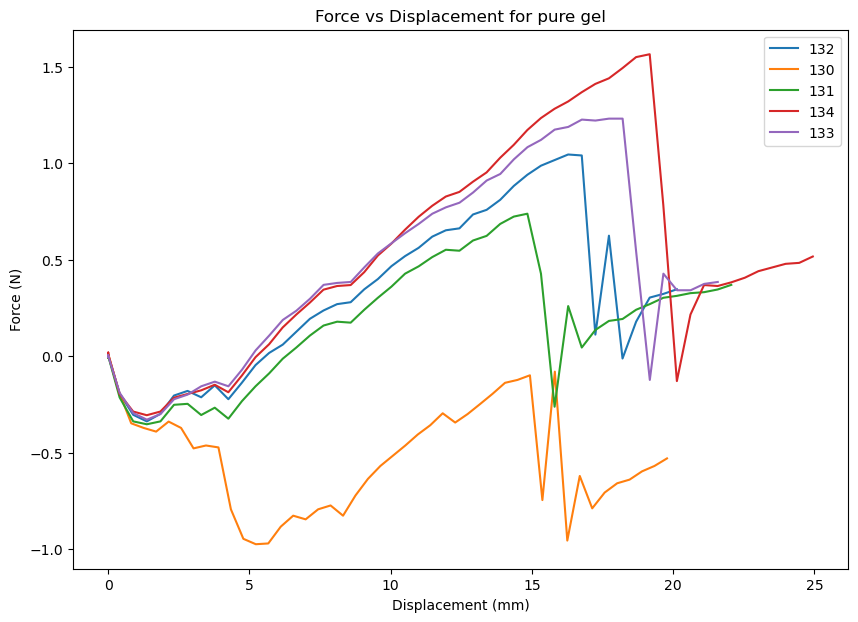

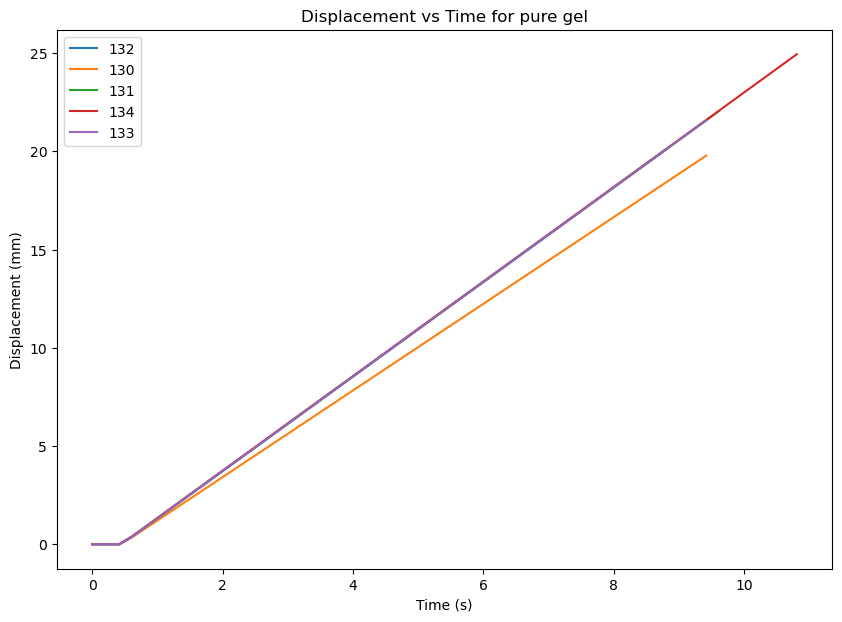

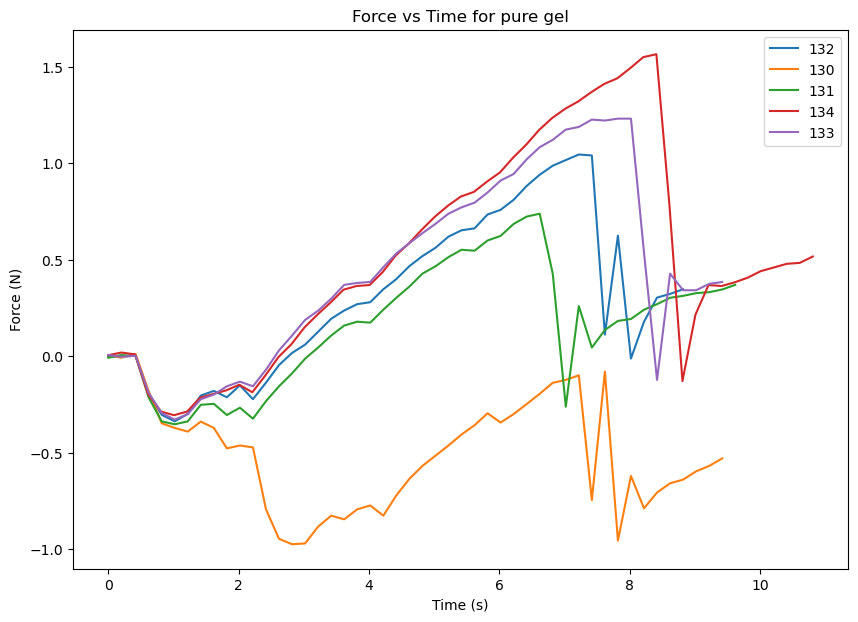

Plotting the curves for material: gel-eco, sample number: 125
Plotting the curves for material: gel-eco, sample number: 129
Plotting the curves for material: gel-eco, sample number: 128
Plotting the curves for material: gel-eco, sample number: 126
Plotting the curves for material: gel-eco, sample number: 127


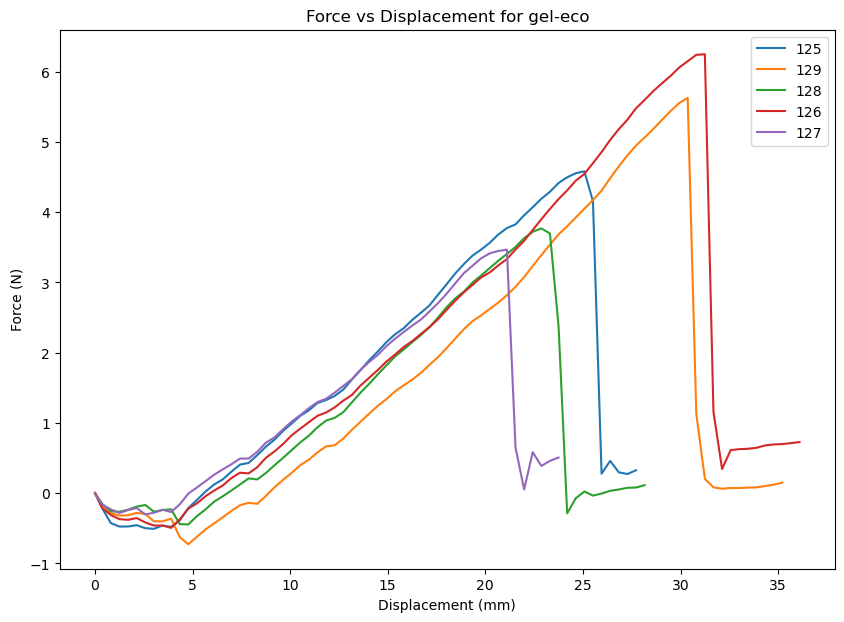

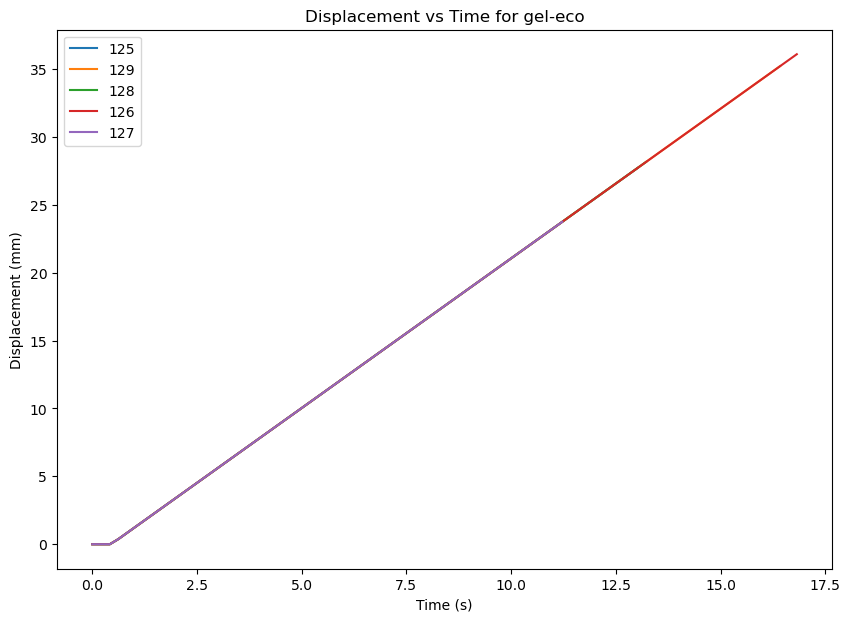

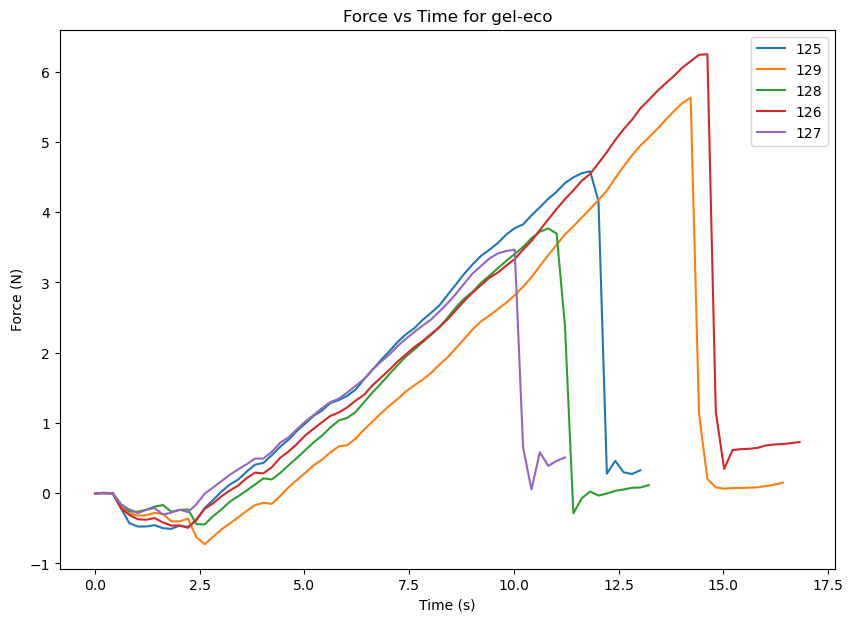

In [6]:
def process_and_plot_dataframes(material, lookup_table):
    # Filter the lookup table for the specific material
    material_data = lookup_table[lookup_table['Material'] == material]

    # Create figure objects for each plot
    fig_force_displacement = plt.figure(figsize=(10, 7))
    ax_force_displacement = fig_force_displacement.add_subplot(111)

    fig_displacement_time = plt.figure(figsize=(10, 7))
    ax_displacement_time = fig_displacement_time.add_subplot(111)

    fig_force_time = plt.figure(figsize=(10, 7))
    ax_force_time = fig_force_time.add_subplot(111)

    # Loop over the rows in the filtered lookup table
    for _, row in material_data.iterrows():
        sample_number = row['Sample_Number']
        file_path = row['File_Path']

        df = pd.read_csv(file_path)  # Read in the data
        df.columns = df.columns.str.strip()  # Strip leading and trailing spaces from column names

        # Print a description for the curve
        print(f"Plotting the curves for material: {material}, sample number: {sample_number}")

        # Stress vs Strain plot
        ax_force_displacement.plot(df['Strain'].values, df['Stress'].values, label=sample_number)

    #     # Force vs Displacement plot
    #     ax_force_displacement.plot(df['Displacement_mm'].values, df['Force_N'].values, label=sample_number)

    #     # Displacement vs Time plot
    #     ax_displacement_time.plot(df['Time_S'].values, df['Displacement_mm'].values, label=sample_number)

    #     # Force vs Time plot
    #     ax_force_time.plot(df['Time_S'].values, df['Force_N'].values, label=sample_number)

    # Add labels, titles, and legends to the plots
    ax_force_displacement.set_xlabel('Strain')
    ax_force_displacement.set_ylabel('Stress (MPa)')
    ax_force_displacement.set_title(f'Stress vs Strain for {material}')
    ax_force_displacement.legend()

    # ax_force_displacement.set_xlabel('Displacement (mm)')
    # ax_force_displacement.set_ylabel('Force (N)')
    # ax_force_displacement.set_title(f'Force vs Displacement for {material}')
    # ax_force_displacement.legend()

    # ax_displacement_time.set_xlabel('Time (s)')
    # ax_displacement_time.set_ylabel('Displacement (mm)')
    # ax_displacement_time.set_title(f'Displacement vs Time for {material}')
    # ax_displacement_time.legend()

    # ax_force_time.set_xlabel('Time (s)')
    # ax_force_time.set_ylabel('Force (N)')
    # ax_force_time.set_title(f'Force vs Time for {material}')
    # ax_force_time.legend()

    #TODO: Calculate the Young's modulus and store it in a variable

    # Show the plots
    plt.show()




process_and_plot_dataframes('pure gel', lookup_table)
process_and_plot_dataframes('gel-eco', lookup_table)
# And so on for other materials
